<a href="https://colab.research.google.com/github/erick-huang15/Food-Sales-Predictions/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive # this is to mount the google drive to this workbook 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd # this is to import all the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/CD: Project 1/sales_predictions.csv' # this is to link the file from google drive
food_sp_data = pd.read_csv(data_path) # this is to tread the csv file
food_sp_data.head() # this is to show the first 5 rows on the data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### How many rows and columns? 8,523 rows and 12 columns 

In [4]:
food_sp_data.shape # this is to get the number of rows and column 

(8523, 12)

In [5]:
num_col = len(food_sp_data.columns) # this is to get the number of columns and store it in num_col
num_col

12

In [6]:
num_row = len(food_sp_data) # this is to get the number of rows and store it in num_row
num_row

8523

#### What are the datatypes of each variable? Object, Int and Float

In [7]:
datatype = food_sp_data.dtypes # this is to check the datatypes and store it in a variable
datatype # show the datatype that is stored in datatype variable 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

####Are there any duplicates? If so, drop any duplicates? No, there are no duplicates

In [8]:
food_sp_data.duplicated().sum() # this is to check the duplicate data in the dataset

0

#### Identify missing values? Item_Weight and Outlet_Size both columns have missing values

In [9]:
null_values = food_sp_data.isna().sum() # this is to identify missing value
null_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####  Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice). The missing values are weight which will be addressed by imputing the average of the column. The missing values in outlet_size will be filled with the most frequent entry based on the traffic of the visitors visiting a particular outlet. 

In [10]:
food_sp_data['Item_Weight'].fillna(value=food_sp_data['Item_Weight'].mean(),inplace=True) # this it to replace the missing values with mean

In [11]:
from sklearn.impute import SimpleImputer # this is to import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # this is to store the function in a variable
imputer = imputer.fit(food_sp_data[['Outlet_Size']]) # this is to impute the most frequent entry that can be found in outlet size
food_sp_data['Outlet_Size'] = imputer.transform(food_sp_data[['Outlet_Size']])

 #### Confirm that there are no missing values after addressing them.

In [12]:
food_sp_data.isna().sum() # this is to check and confirm there are no more missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##### Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [13]:
for col in food_sp_data: # this loop is to loop through the dataset in order to investigate, find and fix inconsistent categories of data
  print(col)
  print(food_sp_data[col].value_counts(dropna=False))
  print("\n\n")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64



Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682

In [14]:
replace_fc = {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'} #fix the data in Item_Fat_Content #LF, reg, low fat
food_sp_data['Item_Fat_Content'] = food_sp_data['Item_Fat_Content'].replace(replace_fc)
food_sp_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [15]:
food_sp_data.describe() # this is to get the statistics of min, max, mean

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Histogram to view the distributions of various features in your dataset.Boxplot to view statistical summaries of various features in your dataset.Heatmap of the correlation between features.

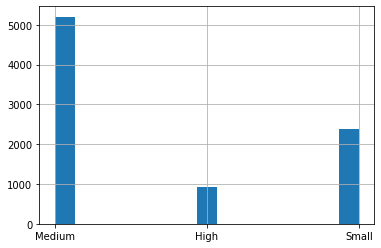

In [16]:
food_sp_data['Outlet_Size'].hist(bins='auto') # this is a histogram to view the distribtion across outlet types from small, medium to large

In [21]:
food_sp_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


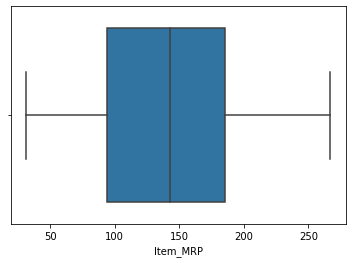

In [67]:
sns.boxplot(data=food_sp_data, x='Item_MRP')

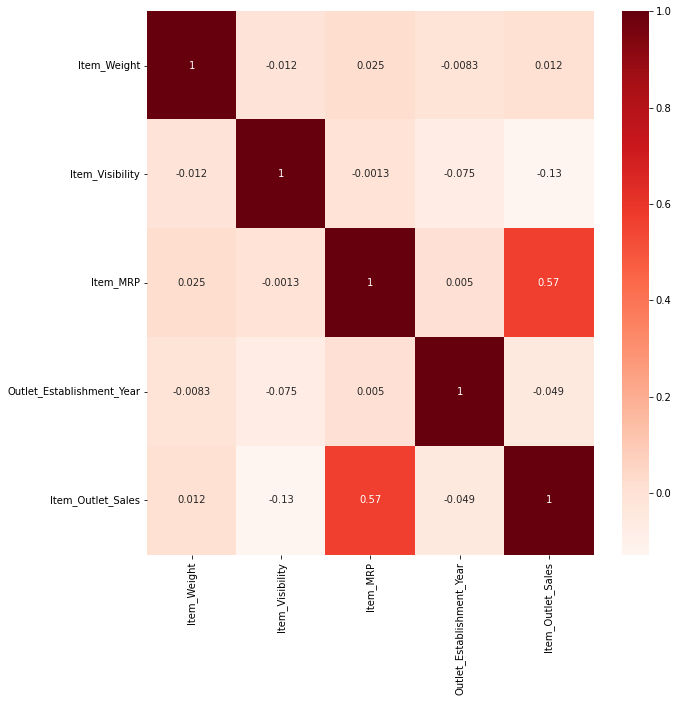

In [73]:
correlation = food_sp_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='Reds',annot=True)